In [28]:
from urllib.request import urlopen
import netCDF4 as nc
    
url = 'https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.4.6.0.0.median.nc'
with urlopen(url) as stream:
    ds = nc.Dataset('HadCRUT', memory=stream.read())
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: HadCRUT4 near-surface temperature ensemble data - ensemble median
    institution: Met Office Hadley Centre / Climatic Research Unit, University of East Anglia
    history: Updated at 25/03/2019 16:03:56
    source: CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment: 
    reference: Morice, C. P., J. J. Kennedy, N. A. Rayner, and P. D. Jones (2012), Quantifying uncertainties in global and regional temperature change using an ensemble of observational estimates: The HadCRUT4 dataset, J. Geophys. Res., doi:10.1029/2011JD017187
    version: HadCRUT.4.6.0.0
    Conventions: CF-1.0
    ensemble_members: 100
    ensemble_member_index: 0
    dimensions(sizes): latitude(36), longitude(72), field_status_string_length(1), time(2030)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time,latitude,longitude), |S1 field_status(ti

In [34]:
ds.variables.keys()

odict_keys(['latitude', 'longitude', 'time', 'temperature_anomaly', 'field_status'])

In [2]:
ds['temperature_anomaly']

<class 'netCDF4._netCDF4.Variable'>
float32 temperature_anomaly(time, latitude, longitude)
    long_name: near_surface_temperature_anomaly
    units: K
    missing_value: -1e+30
    _FillValue: -1e+30
    reference_period: [1961 1990]
unlimited dimensions: time
current shape = (2030, 36, 72)
filling on

In [3]:
globaltemp = ds['temperature_anomaly'][...].mean(axis=-1).mean(axis=-1)
globaltemp

masked_array(data=[-0.9921442098392298, -0.4299474069942388,
                   -0.8906383490209431, ..., 0.9350768180678984,
                   0.7332507083408013, 1.0629966449122144],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [4]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    long_name: time
    units: days since 1850-1-1 00:00:00
    calendar: gregorian
    start_year: 1850
    end_year: 2019
    start_month: 1
    end_month: 2
    axis: T
unlimited dimensions: time
current shape = (2030,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
dates = nc.num2date(ds['time'][...], units=ds['time'].units, calendar='gregorian')
dates

array([datetime.datetime(1850, 1, 16, 12, 0),
       datetime.datetime(1850, 2, 15, 0, 0),
       datetime.datetime(1850, 3, 16, 12, 0), ...,
       datetime.datetime(2018, 12, 16, 12, 0),
       datetime.datetime(2019, 1, 16, 12, 0),
       datetime.datetime(2019, 2, 15, 0, 0)], dtype=object)

In [6]:
import pandas as pd
df1 = pd.DataFrame({'date': dates, 'HadCrut4': globaltemp})
df1.set_index('date', inplace=True)
df1.tail()

,HadCrut4
date,
2018-10-16 12:00:00,0.912286
2018-11-16 00:00:00,0.728863
2018-12-16 12:00:00,0.935077
2019-01-16 12:00:00,0.733251
2019-02-15 00:00:00,1.062997


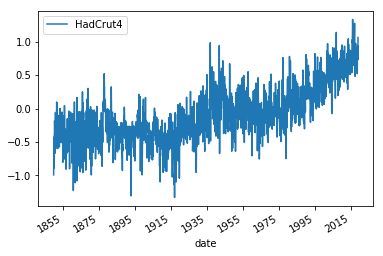

In [7]:
%matplotlib inline
df1.plot();   # use ; to suppress the <matplotlib.axes._subplots.AxesSubplot at 0x...> output

## Read the NOAAGlobalTemp (previously MLOST) dataset

In [8]:
url = 'ftp://ftp.cdc.noaa.gov/Datasets/noaaglobaltemp/air.mon.anom.nc'
with urlopen(url) as stream:
    ds = nc.Dataset('NOAAGlobalTemp', memory=stream.read())
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    platform: Surface
    Conventions: CF-1.0
    title: NOAA Global Temperature
    Source: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
    source: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
    history: Created 12/16 using new V4.00 data from changed operational directory
    dataset_title: NOAA Global Surface Temperature (NOAAGlobalTemp)
    version: V4.01
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.noaaglobaltemp.html
    date_modified: 06 Mar 2019
    data_modified: 2019-05-08
    dimensions(sizes): time(1671), lat(36), lon(72), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float64 time_bnds(time,nbnds), float32 air(time,lat,lon)
    groups: 

As before, we inspect the individual variables we're interested in as well.

In [9]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1800-1-1 00:00:0.0
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    standard_name: time
    axis: T
    coordinate_defines: start
    bounds: time_bnds
    actual_range: [29219. 80047.]
unlimited dimensions: time
current shape = (1671,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
globaltemp = ds['air'][...].mean(axis=-1).mean(axis=-1)
df2 = pd.DataFrame({'date': nc.num2date(ds['time'][...], units='days since 1800-1-1 00:00:0.0'),
                    'NOAAGlobalTemp': globaltemp})
df2.set_index('date', inplace=True)
df2.head()

,NOAAGlobalTemp
date,
1880-01-01,-0.254079
1880-02-01,-0.395865
1880-03-01,-0.474940
1880-04-01,-0.339964
1880-05-01,-0.304502


## Read the GISS dataset

In [11]:
url = 'ftp://ftp.cdc.noaa.gov/Datasets/gistemp/landonly/250km/air.2x2.250.mon.anom.land.nc'
with urlopen(url) as stream:
    ds = nc.Dataset('GISS', memory=stream.read())
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing lan only
    comments: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing land only
    platform: Analysis
    Source: http://data.giss.nasa.gov/gistemp/ source and http://data.giss.nasa.gov/pub/gistemp/ data
    Documentation: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions: COARDS
    history: created at PSD Jun 2009 by CAS. Converted to chunked, deflated non-packed NetCDF4 2014/06
    dataset_title: GISS Surface Temperature Analysis
    data_modified: 2019-05-08
    dimensions(sizes): lon(180), lat(90), time(1671), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time,lat,lon)
    groups: 

Conveniently, this dataset follows the same format as the NOAAGlobalTemp dataset, so we rely on our findings from that one (including things like the date zero point).

In [12]:
globaltemp = ds['air'][...].mean(axis=-1).mean(axis=-1)
df3 = pd.DataFrame({'date': nc.num2date(ds['time'][...], units='days since 1800-1-1 00:00:0.0'),
                    'GISS': globaltemp})
df3.set_index('date', inplace=True)
df3.head()

,GISS
date,
1880-01-01,-0.128901
1880-02-01,-0.710524
1880-03-01,-0.381598
1880-04-01,-0.198299
1880-05-01,-0.232266


We'd like to put all the three datasets into the same dataframe, with the same date points. Unfortunately, the dates for the first and latter two datasets aren't at the same points (mid-month versus start of the month), so we'll need to bring the dates to the same point. This assumes of course, that there is no real difference in the actual day of the month, and only the month and year itself are the important datestamps.

We perform some operations with Pandas datetime functionality to bring all dates to the first of the month: we subtract ten days for the first dataframe to get the day closer to the start of the month, snap to nearest month start, then floor (round to lowest) day start
- we can't use floor with a month start, since its frequency (month length) is variable (this is a Pandas limitation)
- we can't use snap directly, since some days will then be rounded to the start of the month, others to the end of the month

See http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.floor.html#pandas.DatetimeIndex.floor and http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases for some details.

Subtracting ten days (or just a few) guarantees two things:
- for dates mid-month, we'll end up below mid-month, so snap rounds down to the start of the month
- for dates at the start of the month, we'll end up around day 20, which snap() rounds up to the start of the next month

This also makes this operation idempotent: once we reach the start of the month, the output will remain at the start of the month, no matter how often we rerun the procedure. (The procedure does break down if one moves before the introduction of the Gregorian calendar, which is unlikely in this context.)

In [13]:
from datetime import timedelta
import numpy as np
df1.index = (df1.index - timedelta(10)).snap('MS').floor('D')

For verification, we calculate the difference in days between the consecutive rows of the index. This should always be between 28 and 31 days inclusive.

In [14]:
dd = np.diff(df1.index)/1e9/86400   # nanoseconds to days
dd = dd.astype(np.int)    # We need to convert `dd` to compare with 28 and 31 below, 
                          # since the type of dd is almost, but not quite, entirely unlike np.int.
assert len(np.where((dd < 28) | (dd > 31))[0]) == 0   # Verify that all consecutive days are a month apart
df1.index

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', length=2030, freq=None)

## Combine the three dataframes

In [15]:
df = pd.concat([df1, df2, df3], axis=1)

Here's what a section of the combined dataframe looks like:

In [16]:
df.head(40*12).tail(24)

,HadCrut4,NOAAGlobalTemp,GISS
1888-01-01,-0.577359,-0.699455,-0.796492
1888-02-01,-0.656319,-0.718738,-0.945968
1888-03-01,-0.926334,-0.833049,-1.163196
1888-04-01,-0.532249,-0.606504,-0.405756
1888-05-01,-0.635143,-0.482058,-0.675715
1888-06-01,-0.533576,-0.407539,-0.302694
1888-07-01,-0.371007,-0.382457,-0.286995
1888-08-01,-0.265540,-0.441215,-0.265466
1888-09-01,-0.346651,-0.309926,-0.359078
1888-10-01,-0.207330,-0.245208,-0.375208


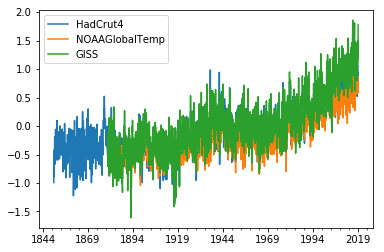

In [17]:
df.plot();    # the semi-colon supresses any output. In this case, annoying "<matplotlib.axes._subplots.AxesSubplot at 0x...>" output

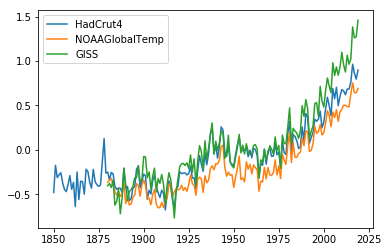

In [18]:
df.groupby(df.index.year).mean().plot();

Below, we calculate for each dataset the average between the years 1961 and 1990, inclusive. We do it for each dataset separately, to remove offset biases between the datasets. The averages are then subtracted from each dataset, and we plot again.

In [19]:
from datetime import datetime

start = datetime(1961, 1, 1)
stop = datetime(1990, 12, 31)
mask = (df.index >= start) & (df.index <= stop)
# Verify it's 30 years total that are masked
mask.sum() == 360

True

We index the dataframe by the mask (by default, the indexing will be done along the rows, which is what we want), and calculate the mean. The mean is calculated for each individual column. The result is a so-called Pandas Series, with just three values.

In [20]:
df[mask].mean()

HadCrut4          0.017835
NOAAGlobalTemp   -0.139239
GISS              0.098361
dtype: float64

We can easily subtract the mean from the full dataframe: Pandas will match the column names, and perform the operation for each individual row.
The result is assigned to a new dataframe (as not to overwrite the old one), and then plotted as before: per yearly average.

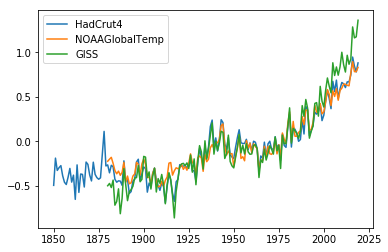

In [21]:
dfd = df - df[mask].mean()
dfd.groupby(df.index.year).mean().plot();